# ASTR101 Project

* have students classify a sample of galaxies in field, filaments, cluster
* morphology should include
  * smooth vs feasures of disk
  * smooth - round, elongated
  * disk 
    * edge on vs face on
    * bulge - s,m,
    * bar
  * color
    * red, yellow, some blue
 
* compare morphologies as a function of environment

* try to make other 

## Need to generate catalogs for them to start with

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
from astropy.io import fits

In [19]:
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

Running on Rose's computer


In [2]:
%run ~/github/Virgo/programs/readtables.py

## Need to generate catalogs for them to use with google sheets

* galaxy id
* ned name
* vr
* SGX, SGY, SGZ
* logMstar
* logSFR
* A100, HI mass
* filament, field, cluster
* group
* local density


### Criteria
* has logMstar, logSFR estimate
* radius flag
* dec < 32 for alfalfa?
* size > ?


In [7]:
v.main.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'NSAID',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAflag',
 'NSAV0flag',
 'A100flag',
 'COflag',
 'HAflag',
 'HAobsflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag',
 'prefix',
 'name']

In [119]:
z0mgs_flag = (v.z0mgs['logmass'] > 0 ) & (v.z0mgs['logmass'] < 14 )   & v.main['Z0MGSflag']
a100_flag = (v.main['DEC'] < 32)
size_flag =  v.main['radius_flag'] & (v.main['radius'] < 150) & (v.main['radius'] > 40)
weird_flag = np.abs(v.env['SGX'] < 40.) & (v.env['n5th_2D'] > -999) 
legacy_flag = (v.main['RA'] > 122)& (v.main['RA'] < 250)
flag = z0mgs_flag & a100_flag & size_flag & weird_flag & legacy_flag
flag_all = z0mgs_flag & size_flag & legacy_flag
print(sum(flag))
print('flag_all',sum(flag_all))
novirgo_flag = flag &(v.env['flag_clus'] < .5)
print(sum(novirgo_flag))

Nsample=50
# filament members
filament_members = np.arange(len(v.main))[v.fil['filament_member'] & novirgo_flag]
filament_members_subset = np.random.choice(filament_members,replace=False,size=Nsample)

# field members
field_members = np.arange(len(v.main))[(v.env['flag_fie']>0.5) & novirgo_flag]
field_members_subset = np.random.choice(field_members,replace=False,size=Nsample)

# randomly select some cluster members
virgo_members = np.arange(len(v.main))[(v.env['flag_clus']>0.5) & flag]
virgo_members_subset = np.random.choice(virgo_members,replace=False,size=Nsample)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


591
flag_all 1037
378


In [120]:
newtab = Table([v.main['VFID'],v.main['RA'],v.main['DEC'],v.main['radius'],v.main['vr'],v.main['NEDname'],v.z0mgs['logmass'],v.z0mgs['logsfr'],v.a100sdss['logMH'],v.fil['filament_member'],v.fil['filament'],v.fil['SGX'],v.fil['SGY'],v.fil['SGZ'],np.log10(v.env['n5th_2D']),v.env['flag_clus'],v.env['flag_fie']])

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [121]:
newtab[filament_members_subset].write('astr101-filaments.fits',overwrite=True)
newtab[field_members_subset].write('astr101-field.fits',overwrite=True)
newtab[virgo_members_subset].write('astr101-virgo.fits',overwrite=True)
newtab[flag_all].write('astr101-all.fits',overwrite=True)


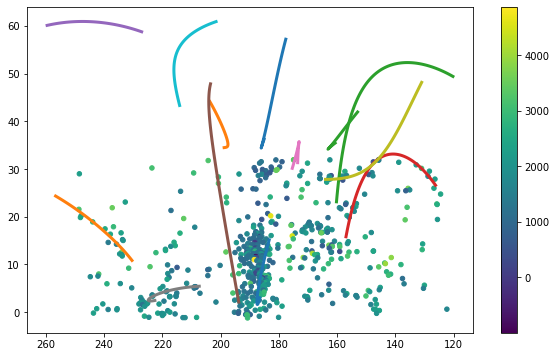

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.env['Vcosmic'][flag],s=20)
plt.colorbar()
virgoCommon.plot_spines()
plt.gca().invert_xaxis()

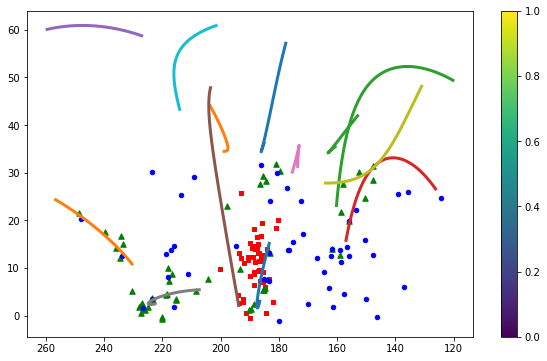

In [123]:
plt.figure(figsize=(10,6))
fflag = [virgo_members_subset,filament_members_subset,field_members_subset]
ssymbols = ['s','^','o']
ssize = [20,30,20]
colors = ['r','g','b']
for i,f in enumerate(fflag):
    plt.scatter(v.main['RA'][f],v.main['DEC'][f],s=ssize[i],c=colors[i],marker=ssymbols[i])
plt.colorbar()
virgoCommon.plot_spines()
plt.gca().invert_xaxis()

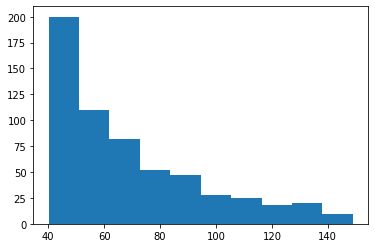

In [124]:
plt.figure()
t = plt.hist(v.main['radius'][v.main['radius_flag'] & flag])

In [125]:
v.fil

dist_3D_NGC5353_4_Filament,dist_3D_W-M_Sheet,filament_dist_2D,dist_3D_LeoII_A_Filament,VFID,dist_2D_NGC5353_4_Filament,dist_2D_Leo_Minor_Filament,dist_2D_Canes_Venatici_Filament,objname,Vcosmic,dist_3D_VirgoIII_Filament,dist_2D_Virgo_Draco_Filament,DEC,SGY,SGX,SGZ,dist_2D_Leo_Minor_B_Filament,recno,dist_3D_Virgo_Draco_Filament,t,pa,RA,dist_3D_Virgo_Serpens_Filament,filament,filament_PA,dist_2D_LeoII_B_Filament,dist_3D_Canes_Venatici_Filament,dist_2D_LeoII_A_Filament,dist_2D_Virgo_Serpens_Filament,dist_2D_VirgoIII_Filament,dist_2D_Ursa_Major_Cloud,dist_3D_LeoII_B_Filament,orientation_wrt_filament,dist_3D_Ursa_Major_Cloud,dist_3D_Virgo_Coma_Berenices_Filament,dist_3D_Leo_Minor_B_Filament,dist_3D_Leo_Minor_Filament,dist_2D_Virgo_Coma_Berenices_Filament,dist_2D_Virgo_Bootes_Filament,dist_2D_W-M_Sheet,filament_dist_3D,filament_member,dist_3D_Virgo_Bootes_Filament
float64,float64,float64,float64,bytes8,float64,float64,float64,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,bytes40,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64
16.167639656390598,20.2651852913019,3.379527299081431,14.277083634903265,VFID0000,6.694588629924937,10.007825593324393,9.198593732529973,NGC4363,1809.6754122333089,18.674489247491774,10.816491928611523,74.9522485,11.738032079989287,13.145689815736862,4.111198355924238,11.873894694894776,0,14.379188469374645,3.0,10.0,185.86877249999998,19.033123848516475,Virgo_Bootes_Filament,113.42767598067097,11.700746028714974,9.540564714299672,14.040354857156297,19.019562832594765,18.673517541989828,5.1906303438495565,11.856247688901448,76.57232401932903,5.641715455939274,12.15675614864798,13.556027898388932,11.456774512809005,11.61107209195696,3.379527299081431,17.700129182521795,5.217677443566046,False,5.217677443566046
20.106046534678526,18.98992627353741,5.171323556709356,12.248307891350121,VFID0001,6.67463419629079,5.171323556709356,7.018253688842302,NGC4133,1081.7584723176835,14.33638383337067,13.996863136938506,74.9042778,7.017661982903995,7.90894905971585,2.284969213716576,7.92534088760895,1,19.934997800102696,3.0,132.24,182.208,15.3939895005203,Leo_Minor_Filament,106.69403584063132,8.574459101057798,7.098342964092882,10.350756772512756,14.864682417003985,13.469047114620121,4.92324406812897,10.847689389210176,25.545964159368694,6.459186416433164,9.22866544709605,13.770091830278878,5.232772280613474,7.1178495983701024,4.328818544758795,12.15682011557807,5.232772280613474,False,9.713558763737423
18.65555603420208,28.534188645153964,14.782650818489234,20.835862839834025,VFID0002,16.64994312968403,19.60945787501236,20.74964753816683,NGC2977,3068.6982545259793,30.760143349119527,16.45257813293989,74.8595778,18.236938715608805,24.57232008873139,2.303486373551084,16.598363331340504,2,16.719479200105578,3.0,145.0,145.944663,31.370141563959233,Virgo_Bootes_Filament,117.24052264173427,14.958244008744234,21.12554308234092,20.48160442855666,30.528624673000643,30.10631923942139,15.859537897880232,15.645159573151759,27.759477358265727,16.42910144981469,20.233715052229854,16.79235352000856,23.082280507465057,19.918853079934753,14.782650818489234,28.334557919656838,14.915240996710157,False,14.915240996710157
14.570666938651831,21.950937823364345,5.840428989011135,16.343886030850097,VFID0003,7.856356031475978,12.86158148626759,12.079207947760487,PGC040048,2211.9535611201745,21.76110017177017,10.12059770120093,74.8383889,14.3805709158205,16.04972421363977,4.987924263296796,13.083872546241533,3,12.210693957213799,-5.0,166.0,185.5730835,21.882166038358058,Virgo_Bootes_Filament,113.42767598067097,12.861928587119305,12.07971874532575,16.343818322940766,21.622524990681516,21.62251140087625,8.15745753111417,12.882549003846885,52.57232401932903,8.168890438256227,14.275158724941045,14.565931260158107,15.263630459855822,13.886616506432041,5.840428989011135,20.72757055171280

In [13]:
v.env

DM,VFID_1,prefix,radius,objname,Vcosmic,M_r,DEC,radius_flag,SGY,SGX,SGZ,NSAID,NEDname,Dmedian,nCI08,RA,Virgo_infall,Steerflag,HAflag,distSGY_Virgo,Vmodel,distSGZ_Virgo,HAobsflag,V_LG,FLUX_R,OBJID,mag_r,nCI08_err,n5th_2D,name,n5th_2D_err,vr,dr9_cat,n5th,distSGX_Virgo,n5th_err,VFID_2,flag_clus,flag_fil,flag_fie,flag_gro,flag_fie_k,flag_gro_k
float64,bytes8,bytes38,float32,bytes28,float64,float64,float64,bool,float64,float64,float64,int32,bytes30,float64,float64,float64,float64,bool,bool,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,bytes8,float64,float64,bytes30,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64
-1000.0,VFID0000,VFID0000-NGC4363,23.829847,NGC4363,1809.6754122333089,-1000.0,74.9522485,True,11.738032079989287,13.145689815736862,4.111198355924238,0,NGC 4363,0.0,0.09991016586256432,185.86877249999998,201.77575192041263,False,False,1.842051278949052,1809.6754122333089,4.526500946558278,False,189.0996603128964,-1000.0,-1000,-1000.0,0.029487553097711262,0.9794328068090807,VFID0000,0.4380156670837047,1418.8,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.09554065900799932,15.409025350662194,0.04272708163140282,VFID0000,0.0,0.0,1.0,0.0,1.0,2.0
-1000.0,VFID0001,VFID0001-NGC4133,49.6731,NGC4133,1081.7584723176835,-1000.0,74.9042778,True,7.017661982903995,7.90894905971585,2.284969213716576,0,NGC 4133,14.61835773402275,0.0805523976400113,182.208,203.4059814252294,True,False,-2.87831881813624,1722.6764108994216,2.7002718043506153,False,187.77042947419227,-1000.0,-1000,-1000.0,0.023774288452540655,0.3121251748232139,VFID0001,0.13958662167874245,1331.5,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.0672333130456668,10.172284594641182,0.030067651664526882,VFID0001,0.0,0.0,1.0,0.0,1.0,0.0
-1000.0,VFID0002,VFID0002-NGC2977,62.3909,NGC2977,3068.6982545259793,-1000.0,74.8595778,True,18.236938715608805,24.57232008873139,2.303486373551084,0,NGC 2977,41.46889533143215,0.09538853839762654,145.944663,144.2026584686125,True,False,8.34095791456857,3380.6160975434336,2.7187889641851237,False,187.01343907482146,-1000.0,-1000,-1000.0,0.028153036947034134,0.9613015495936771,VFID0002,0.4299071223534695,3049.4,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.17530005643618327,26.835655623656724,0.07839656853017106,VFID0002,0.0,0.0,1.0,0.0,1.0,2.0
-1000.0,VFID0003,VFID0003-CGCG352-030,26.128908,PGC040048,2211.9535611201745,-1000.0,74.8383889,True,14.3805709158205,16.04972421363977,4.987924263296796,0,CGCG 352-030,0.0,0.3498271665702569,185.5730835,190.4148690004782,False,False,4.484590114780266,2211.9535611201745,5.403226853930836,False,188.5386921196963,-1000.0,-1000,-1000.0,0.10324822364375134,1.2147736247407455,VFID0003,0.5432632804388254,1833.0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.43998521868016144,18.313059748565102,0.19676737161279023,VFID0003,0.0,0.0,1.0,0.0,1.0,0.0
-1000.0,VFID0004,VFID0004-UGC07189,40.937492,UGC07189,2065.5721196274976,-1000.0,74.8082222,True,13.42946756799603,15.062039166171804,4.409443857800289,0,UGC 07189,0.0,0.5790372585969432,182.82775049999998,195.01873280368198,False,False,3.5334867669557948,2065.5721196274976,4.824746448434329,False,187.5533868238159,-1000.0,-1000,-1000.0,0.17089744332841897,1.9908993941285014,VFID0004,0.890357276326895,1683.0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.5878042339602495,17.325374701097136,0.26287404491946165,VFID0004,0.0,0.0,1.0,0.0,1.0,0.0
-1000.0,VFID0005,VFID0005-NGC3752,48.654305,NGC3752,2202.600664358308,-1000.0,74.6275401,True,14.24733084177353,16.36887945443161,3.77071849313914,0,NGC 3752,29.76487384267984,0.14780868228193356,173.1341835,186.5548487279452,True,False,4.351350040733296,2291.262875707811,4.18602108377318,False,184.608026979866,-1000.0,-1000,-1000.0,0.043624353232350664,0.710316038718794,VFID0005,0.31766298961671924,1920.1,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.14521501536328987,18.632214989356942,0.0649421291411985,VFID0005,0.0,0.0,1.0,0.0,2.0,0.0
-1000.0,VFID0006,VFID0006-UGC04202,26.984928,UGC04202,2785.709119178054,-1000.0,74.5846308,True,14.429624490058709,23.8234

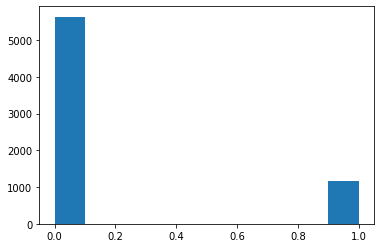

In [33]:
plt.figure()
t = plt.hist(v.env['flag_clus'])